# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **60**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Karthick Ramasubramanian

EID: KR33733

Name: Yashaswini Kalva

EID: YK8348

# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:  
a)  This represents the Bias of the estimator.  Bias is error arrising due to incorrect assumptions in the model

b) The reason for the tradeoff is due to the complexity of the model.  The more complex the model we tend to overfit to the training data and hence making the model Biased.  On the other hand, if the model is too simple, the model will not capture all the information of the features leading to more variance.

# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


In [ ]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
%pylab inline

from google.colab import files
uploaded = files.upload()

data_load = np.load('data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

Populating the interactive namespace from numpy and matplotlib


Saving data.npy to data.npy


In [ ]:
max(y_train)

132.22361440154063

In [ ]:
def plot_curves(x_train, y_train, x_test, y_test):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 

  # YOUR CODE COMES HERE

  model = LinearRegression()

  x_train2 = np.vander(np.squeeze(x_train), 3)
  x_test2 = np.vander(np.squeeze(x_test), 3)

  result2 = model.fit(pd.DataFrame(x_train2), y_train)
  x_train2_mse = mean_squared_error(y_train, result2.predict(pd.DataFrame(x_train2)))
  x_test2_mse = mean_squared_error(y_test, result2.predict(pd.DataFrame(x_test2)))
  x_test2_predicted = result2.predict(pd.DataFrame(x_test2))
  x_all2_predicted = result2.predict(pd.DataFrame(np.vander(np.squeeze(x_all), 3)))


  print('\n')
  print('2nd Degree')
  print('Train MSE is ', x_train2_mse)
  print('Test MSE is ', x_test2_mse)


  x_train4 = np.vander(np.squeeze(x_train), 5)
  x_test4 = np.vander(np.squeeze(x_test), 5)

  result4 = model.fit(pd.DataFrame(x_train4), y_train)
  x_train4_mse = mean_squared_error(y_train, result4.predict(pd.DataFrame(x_train4)))
  x_test4_mse = mean_squared_error(y_test, result4.predict(pd.DataFrame(x_test4)))
  x_test4_predicted = result4.predict(pd.DataFrame(x_test4))
  x_all4_predicted = result4.predict(pd.DataFrame(np.vander(np.squeeze(x_all), 5)))
  
  print('\n')
  print('4th Degree')
  print('Train MSE is ', x_train4_mse)
  print('Test MSE is ', x_test4_mse)

  x_train7 = np.vander(np.squeeze(x_train), 8)
  x_test7 = np.vander(np.squeeze(x_test), 8)

  result7 = model.fit(pd.DataFrame(x_train7), y_train)
  x_train7_mse = mean_squared_error(y_train, result7.predict(pd.DataFrame(x_train7)))
  x_test7_mse = mean_squared_error(y_test, result7.predict(pd.DataFrame(x_test7)))
  x_test7_predicted = result7.predict(pd.DataFrame(x_test7))
  x_all7_predicted = result7.predict(pd.DataFrame(np.vander(np.squeeze(x_all), 8)))

  print('\n')
  print('7th Degree')
  print('Train MSE is ', x_train7_mse)
  print('Test MSE is ', x_test7_mse)


  fig, (ax1) = subplots(nrows = 1, ncols = 1, figsize = (16,8) )
  ax1.plot(x_train,y_train, color='black',marker = 'o', linestyle = 'None', label = 'Train')
  ax1.plot(x_test,y_test, color = 'blue',marker = 'o',linestyle = 'None', label = 'Test')

  ax1.plot(x_test, x_test2_predicted , color = 'red',marker = 'o',  linestyle = 'None')
  ax1.plot(x_test, x_test4_predicted , color = 'yellow',marker = 'o',  linestyle = 'None')
  ax1.plot(x_test, x_test7_predicted , color = 'blue',marker = 'o', linestyle = 'None')

  ax1.plot(x_all, x_all2_predicted , color = 'red',marker = 'None',  label = '2nd Order Polynomial')
  ax1.plot(x_all, x_all4_predicted , color = 'yellow',marker = 'None', label = '4th Order Polynomial')
  ax1.plot(x_all, x_all7_predicted , color = 'blue',marker = 'None', label = '7th Order Polynomial')
  
  xlim(-10,10)
  ylim(-40,140)

  ax1.legend()


  show()



  return [x_train2_mse,x_train4_mse,x_train7_mse] , [x_test2_mse,x_test4_mse,x_test7_mse]



2nd Degree
Train MSE is  247.2967979737153
Test MSE is  320.06408346977855


4th Degree
Train MSE is  31.72001805729006
Test MSE is  31.29208288660671


7th Degree
Train MSE is  30.677193592109738
Test MSE is  33.410694077690124


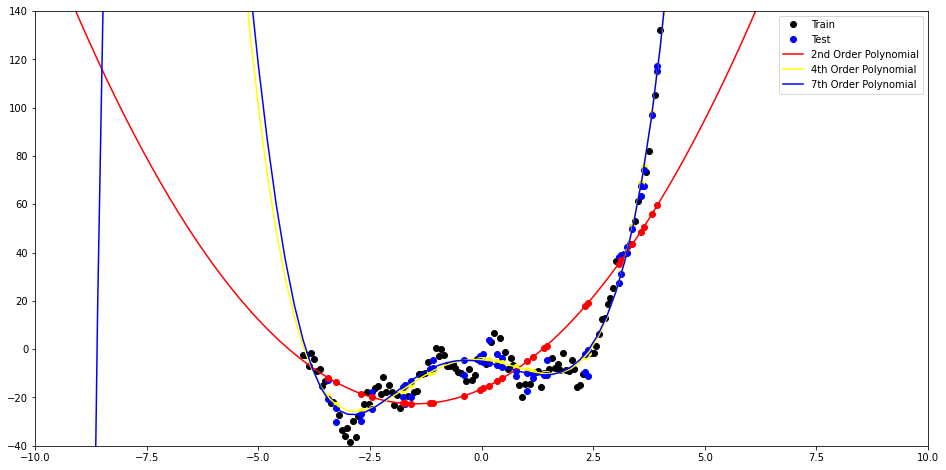

In [ ]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

b) Fourth Degree polynomial gives the best Test MSE.  
We observed that the training MSE is continuously decreasing but Test MSE increased when jumping from 4th degree to 7th degree polynomial indicating that we are overfitting the data.  Meaning the Bias is reducing but the increase in variance is increasing the overall error.  

In other words, 2nd Degree model has High Bias and Low Variance, 7th Degree Low Bias and High Variance.  The 4th Degree has medium Bias and Variance giving the overall best results.

20% data


2nd Degree
Train MSE is  161.17147378830037
Test MSE is  402.3231269099287


4th Degree
Train MSE is  35.11511313912979
Test MSE is  38.34074498344277


7th Degree
Train MSE is  22.543946691373346
Test MSE is  135.20764526757046


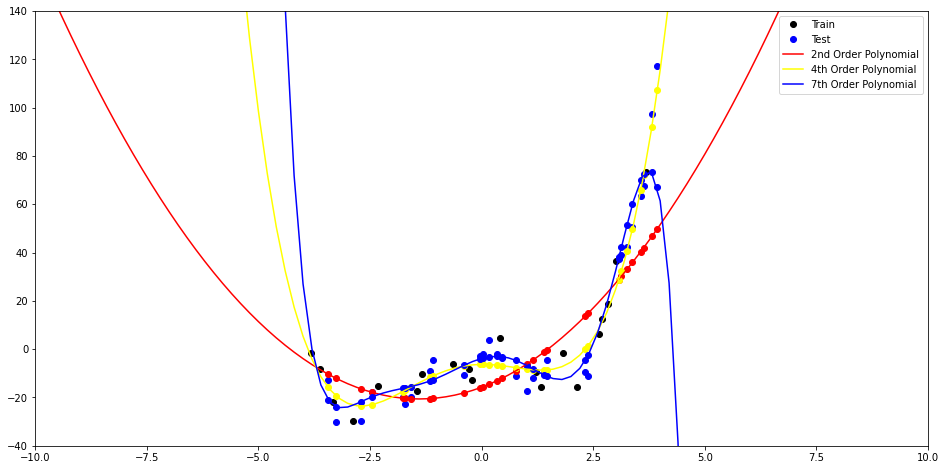

40% data


2nd Degree
Train MSE is  150.33251286085704
Test MSE is  405.80516696165756


4th Degree
Train MSE is  31.6245296464469
Test MSE is  33.16428295918744


7th Degree
Train MSE is  25.492718751653637
Test MSE is  61.23741884551051


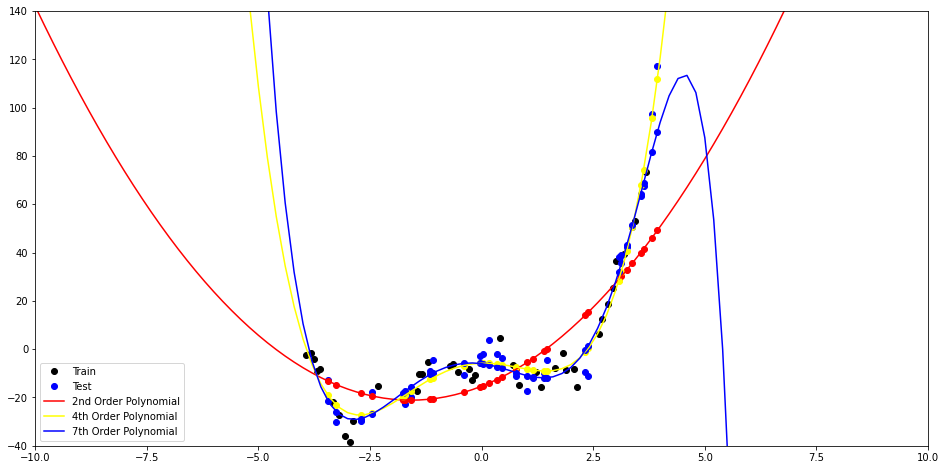

60% data


2nd Degree
Train MSE is  150.08383759141728
Test MSE is  403.2513784833407


4th Degree
Train MSE is  29.1928057399479
Test MSE is  31.78141541619673


7th Degree
Train MSE is  26.099088642454426
Test MSE is  60.16667237664499


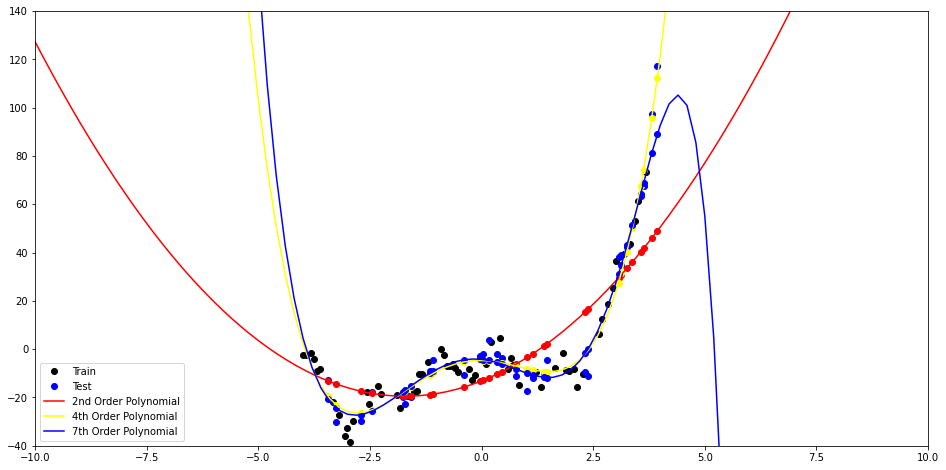

80% data


2nd Degree
Train MSE is  168.1188246150281
Test MSE is  407.59369688184694


4th Degree
Train MSE is  29.305108483323448
Test MSE is  32.51810686874259


7th Degree
Train MSE is  26.549129596283628
Test MSE is  48.07693529710737


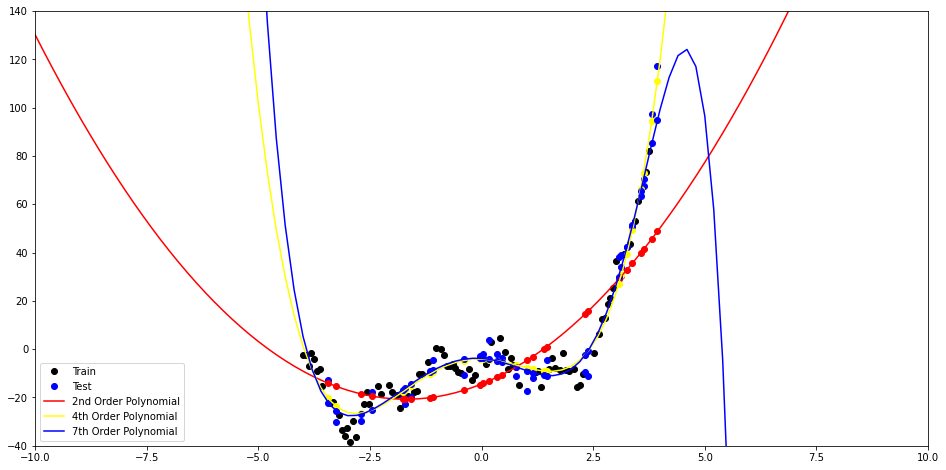

100% data


2nd Degree
Train MSE is  247.2967979737153
Test MSE is  320.06408346977855


4th Degree
Train MSE is  31.72001805729006
Test MSE is  31.29208288660671


7th Degree
Train MSE is  30.677193592109738
Test MSE is  33.410694077690124


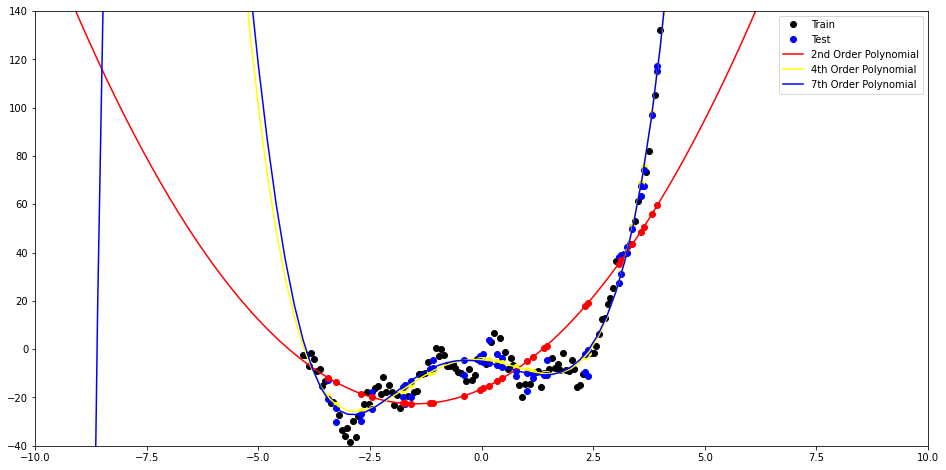

In [ ]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

c)



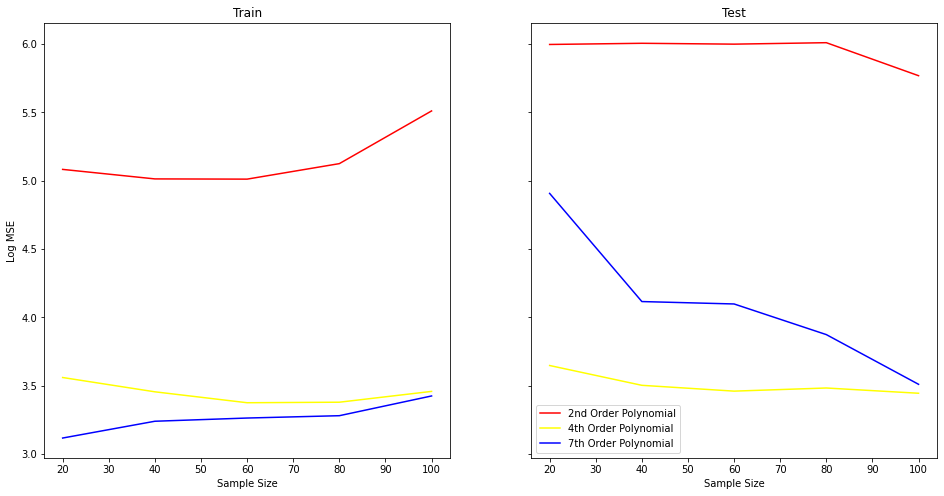

In [ ]:

fig, (ax2, ax1 ) = subplots( nrows=1, ncols=2,
                                sharex=True,
                                sharey=True,
                                figsize=(16,8))


ax2.plot( [20,40,60,80,100], log([train_rmses_20[0], train_rmses_40[0], train_rmses_60[0], train_rmses_80[0], train_rmses_100[0]]) , color = 'red',  label = '2nd Order Polynomial')
ax2.plot( [20,40,60,80,100], log([train_rmses_20[1], train_rmses_40[1], train_rmses_60[1], train_rmses_80[1], train_rmses_100[1]]) , color = 'yellow', label = '4th Order Polynomial')
ax2.plot( [20,40,60,80,100], log([train_rmses_20[2], train_rmses_40[2], train_rmses_60[2], train_rmses_80[2], train_rmses_100[2]]) , color = 'blue', label = '7th Order Polynomial')
ax2.set_title('Train')
ax2.set_xlabel('Sample Size')
ax2.set_ylabel('Log MSE')


ax1.plot( [20,40,60,80,100], log([test_rmses_20[0], test_rmses_40[0], test_rmses_60[0], test_rmses_80[0], test_rmses_100[0]]) , color = 'red',  label = '2nd Order Polynomial')
ax1.plot( [20,40,60,80,100], log([test_rmses_20[1], test_rmses_40[1], test_rmses_60[1], test_rmses_80[1], test_rmses_100[1]]) , color = 'yellow', label = '4th Order Polynomial')
ax1.plot( [20,40,60,80,100], log([test_rmses_20[2], test_rmses_40[2], test_rmses_60[2], test_rmses_80[2], test_rmses_100[2]]) , color = 'blue', label = '7th Order Polynomial')
ax1.set_title('Test')
ax1.set_xlabel('Sample Size')

legend()

show()

For 2nd Order, the train and test error is very high and slighlty decreases on adding more data.  This is likely due to underfitting the data. 

For 4th Order, both the test and train error is low and slightly reduces on adding more data likely due to decrease in model variance.

For 7th Order, the test error drastically reduces as we add more data.  Meaning the model is most likely overfitting.  

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

a)  Gradient descent is where we try to find the minima by trying to move in the opposite directiong of the slope of the function.  The disadvantage is setting the right learning rate as a rate too low will take a long time to converge and a rate too high will make it to oscillate around the minima and worst case even diverge.

In Stochastic Gradient Method we use a small or single sample of the training set to update the parameters.  Hence, SGM is much faster compared to GD but the results might as accurate as GD. 

b)  In Nelder-Mead method we take points (number of dimensions + 1) that are close to each other and move in the direction where the value is lower (if its a minimisation problem).  As the 1 point moves in the direction, the other point contracts to close the gap and these 2 steps are iterated.  The rate at which these points expand and contract are defined by the 2 rate parameters.

Nelder-Mead method does not perform well with higher dimentional problems as it is exponentially more difficult as dimension increases to determine the direction to move in.

# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:
https://drive.google.com/file/d/1ZanBfzwB13ArsjyC_OMKjxEgXnN9OFcT/view?usp=sharing

![](https://drive.google.com/uc?export=view&id=1ZanBfzwB13ArsjyC_OMKjxEgXnN9OFcT)





# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving SGD_samples-1.csv to SGD_samples-1.csv


In [ ]:
# %matplotlib inline
# import random
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd


# df = pd.read_csv('SGD_samples-1.csv')
# df2 = pd.DataFrame(columns=['y','x1','x1x2','e-x1'])

# df2['y'] = df['y']
# df2['x1'] = df['x1']
# df2['x1x2'] = df['x1'] * df['x2']
# df2['e-x1'] = np.exp(-df['x1'])

In [ ]:
class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        # = please put your codes here to update the self.coef using SGD 
        self.coef = self.coef + self.learning_rate * gradient
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                      #please put your codes here
                error =  y[i] - np.dot(X[i], self.coef)

                # Compute gradients
                      #please put your codes here
                gradient = np.multiply(error,X[i]) + self.regularization*self.coef
              
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

        return self.lowest_mse

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      self.coef.T * X
      #compute the dot product of self.coef and X
      return np.dot(X,self.coef)

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('SGD_samples-1.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answer:

In [ ]:
mse_mat = np.zeros((7,3))
a=0
b=0

for i in learning_rate:
  for j in regularization:
    mse_mat[a,b] = Regression(i, j, n_epochs).fit(X,y,'sgd',False)
    b+=1
  b=0
  a+=1

mse_mat

array([[3.68205118e-02, 2.84795513e+02, 3.91411730e+58],
       [3.04959915e-02, 1.10638808e+58,            nan],
       [2.73910876e-02,            inf,            nan],
       [3.09876280e-02,            nan,            nan],
       [           inf,            nan,            nan],
       [           nan,            nan,            nan],
       [           nan,            nan,            nan]])

In [ ]:
print('Best MSE = 2.73910876e-02,  Learning Rate = 0.01,  Regularization = 0')
print('2nd Best MSE = 3.04959915e-02,  Learning Rate = 0.001,  Regularization = 0')

Best MSE = 2.73910876e-02,  Learning Rate = 0.01,  Regularization = 0
2nd Best MSE = 3.04959915e-02,  Learning Rate = 0.001,  Regularization = 0


Best Case


0.027391087575201017

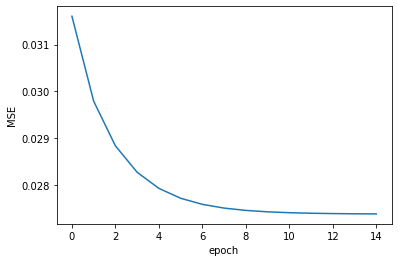

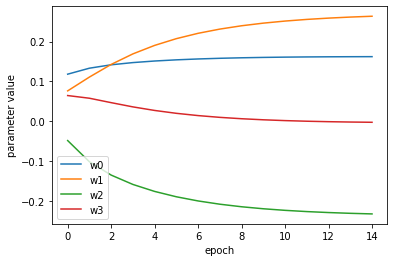

In [ ]:
import warnings
warnings.filterwarnings("ignore")
print('Best Case')
Regression(0.01, 0, 15).fit(X,y,'sgd',True)

2nd Best Case


0.030495991520073526

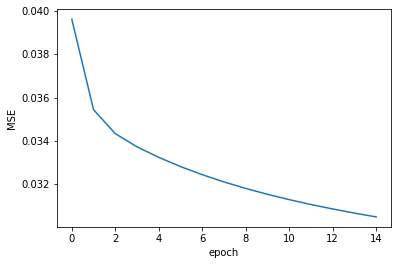

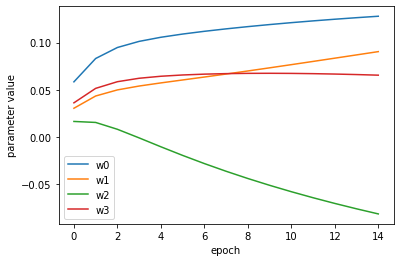

In [ ]:
import warnings
warnings.filterwarnings("ignore")
print('2nd Best Case')
Regression(0.001, 0, 15).fit(X,y,'sgd',True)